# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
query_url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

weather_stats = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    cityurl = query_url + "&q=" + city
    
    try:
        
        weather_by_city = requests.get(cityurl).json()
        
        lat = weather_by_city['coord']['lat']
        lng = weather_by_city['coord']['lon']
        max_temp = weather_by_city['main']['temp_max']
        humidity = weather_by_city['main']['humidity']
        clouds = weather_by_city['clouds']['all']
        wind = weather_by_city['wind']['speed']
        country = weather_by_city['sys']['country']
        date = weather_by_city['dt']
        
        weather_stats.append({
            "City": city,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": max_temp,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": wind,
            "Country": country,
            "Date": date
        })
        
    except:
        pass

print("retrieval complete")


retrieval complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
weather_stats_df = pd.DataFrame(weather_stats)
# weather_stats_df.head()

cities_lats = weather_stats_df["Lat"]
cities_max_temps = weather_stats_df["Max Temp"]
cities_humidity = weather_stats_df["Humidity"]
cities_cloudiness = weather_stats_df["Cloudiness"]
cities_windspeed = weather_stats_df["Wind Speed"]

In [36]:
weather_stats_df.to_csv(output_file, index_label = "City ID")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

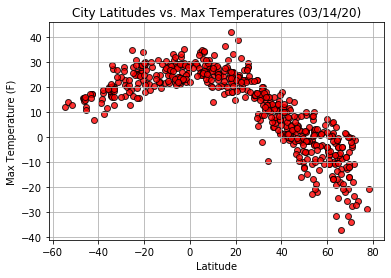

In [42]:
plt.scatter(
    cities_lats,
    cities_max_temps,
    edgecolor="black", linewidths=1, marker="o", color = "red", 
    alpha=0.8, label="Cities")

plt.title("City Latitudes vs. Max Temperatures (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("lat_vs_temp.png")

plt.show()

#### Latitude vs. Humidity Plot

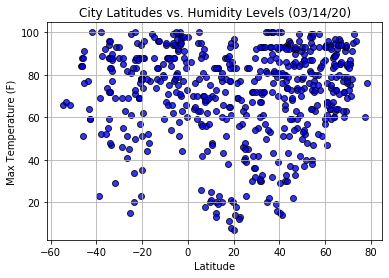

In [44]:
plt.scatter(
    cities_lats,
    cities_humidity,
    edgecolor="black", linewidths=1, marker="o", color = "blue", 
    alpha=0.8, label="Cities")

plt.title("City Latitudes vs. Humidity Levels (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("lat_vs_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

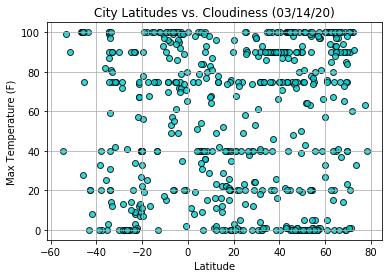

In [51]:
plt.scatter(
    cities_lats,
    cities_cloudiness,
    edgecolor="black", linewidths=1, marker="o", color = "darkturquoise", 
    alpha=0.8, label="Cities")

plt.title("City Latitudes vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("lat_vs_clouds.png")

plt.show()

#### Latitude vs. Wind Speed Plot

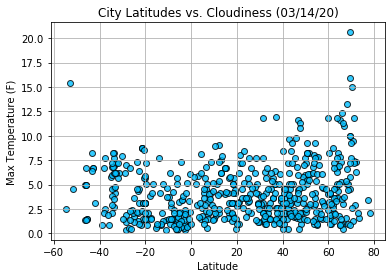

In [50]:
plt.scatter(
    cities_lats,
    cities_windspeed,
    edgecolor="black", linewidths=1, marker="o", color = "deepskyblue", 
    alpha=0.8, label="Cities")

plt.title("City Latitudes vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("lat_vs_winds.png")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression